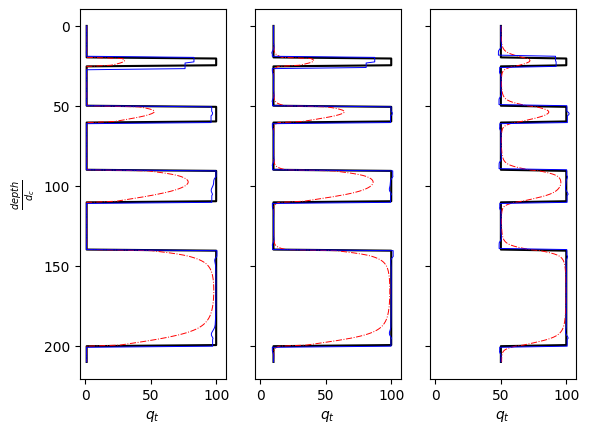

In [1]:
# Replicate Figure 5 from Boulanger and DeJong (2018)
import numpy as np
import matplotlib.pyplot as plt
import smt

q_t = []
zd_vec = []
N = 300
z50ref = 4.2
m50 = 0.5
mq = 2.0
mz = 3.0
dc = 0.03568
n_iter = 500
rate_lim = 0.1
tol = 1.e-6
dz_dec = 0.02/0.03568*dc

depth = np.linspace(0,210,N) * dc
zprime = (depth[:, np.newaxis] - depth) / dc

qt_a = np.full(N, 1.0)
qt_b = np.full(N, 10.0)
qt_c = np.full(N, 50.0)

layer1 = (depth>20*dc) & (depth<25*dc)
layer2 = (depth>50*dc) & (depth<60*dc)
layer3 = (depth>90*dc) & (depth<110*dc)
layer4 = (depth>140*dc) & (depth<200*dc)
qt_a[layer1] = 100
qt_a[layer2] = 100
qt_a[layer3] = 100
qt_a[layer4] = 100

qt_b[layer1] = 100
qt_b[layer2] = 100
qt_b[layer3] = 100
qt_b[layer4] = 100

qt_c[layer1] = 100
qt_c[layer2] = 100
qt_c[layer3] = 100
qt_c[layer4] = 100

C1 = 1.0 + zprime / 8.0
C1[zprime > 0] = 1.0
C1[zprime < -4.0] = 0.5
C2 = np.ones((len(zprime), len(zprime)), dtype=float)
C2[zprime < 0] = 0.8

# First convolve to get a layer-influenced profile
qt_a_convolved = smt.convolve(qt_a, zprime, C1, C2, z50ref, m50, mq, mz)
qt_b_convolved = smt.convolve(qt_b, zprime, C1, C2, z50ref, m50, mq, mz)
qt_c_convolved = smt.convolve(qt_c, zprime, C1, C2, z50ref, m50, mq, mz)

# Now apply inverse filter to recover original tip resistance
qt_a_inv_vec = smt.cpt_inverse_filter(qt_a_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_b_inv_vec = smt.cpt_inverse_filter(qt_b_convolved, depth, low_pass=True, smooth=True, remove_interface=True)
qt_c_inv_vec = smt.cpt_inverse_filter(qt_c_convolved, depth, low_pass=True, smooth=True, remove_interface=True, niter=500)


fig, ax = plt.subplots(ncols=3, sharey='row', sharex='row')
ax[0].plot(qt_a,depth/dc, c='black')
ax[0].plot(qt_a_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[0].plot(qt_a_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[1].plot(qt_b,depth/dc, c='black')
ax[1].plot(qt_b_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[1].plot(qt_b_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[2].plot(qt_c,depth/dc, c='black')
ax[2].plot(qt_c_convolved,depth/dc, c='red', linestyle='-.', linewidth=0.7)
ax[2].plot(qt_c_inv_vec,depth/dc, c='blue', linewidth=0.7)
ax[0].set_ylabel(r'$\frac{depth}{d_c}$')
ax[0].set_xlabel(r'$q_t$')
ax[1].set_xlabel(r'$q_t$')
ax[2].set_xlabel(r'$q_t$')
ax[0].invert_yaxis()